<a href="https://colab.research.google.com/github/benvictoria21/pandas/blob/master/students_score_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/student-mat.csv')

In [6]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [9]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df['average_grade']=(df['G1']+df['G2']+df['G3'])/3

In [13]:
df=df.drop(["G1","G2","G3"],axis=1)

In [14]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,average_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,8.666667


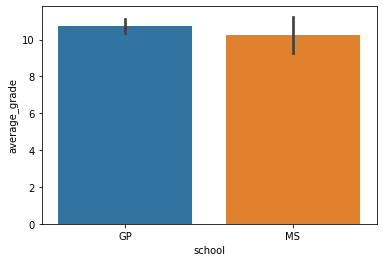

In [15]:
sns.barplot(x=df["school"],y=df["average_grade"],data=df)

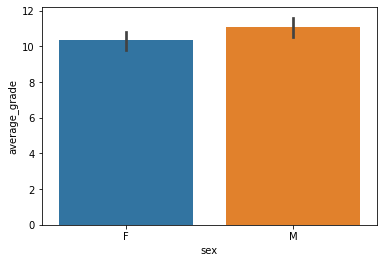

In [16]:
sns.barplot(x=df["sex"],y=df["average_grade"],data=df)

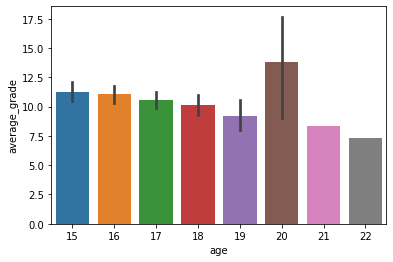

In [17]:
sns.barplot(x=df["age"],y=df["average_grade"],data=df)

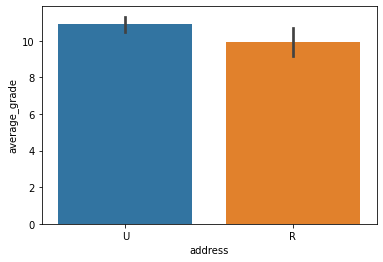

In [19]:
sns.barplot(x=df['address'],y=df['average_grade'],data=df)

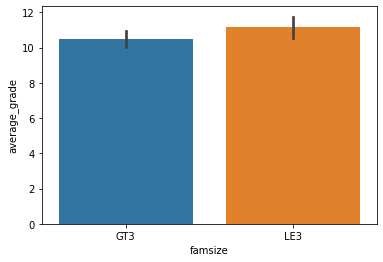

In [20]:
sns.barplot(x=df['famsize'],y=df['average_grade'],data=df)

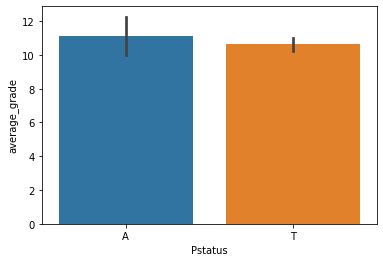

In [21]:
sns.barplot(x=df['Pstatus'],y=df['average_grade'],data=df)

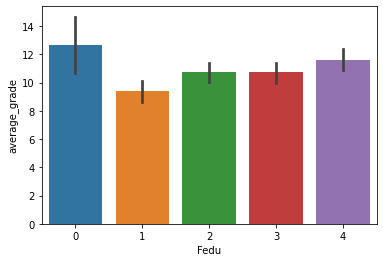

In [22]:
sns.barplot(x=df['Fedu'],y=df['average_grade'],data=df)

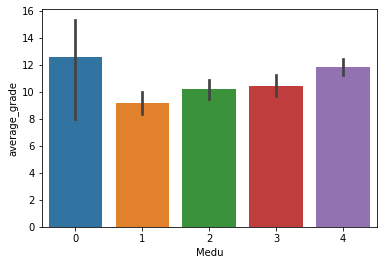

In [23]:
sns.barplot(x=df['Medu'],y=df['average_grade'],data=df)

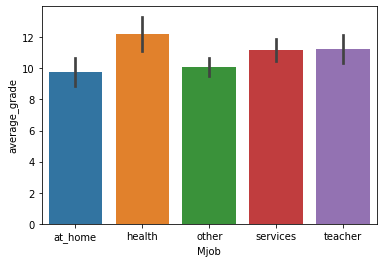

In [24]:
sns.barplot(x=df['Mjob'],y=df['average_grade'],data=df)

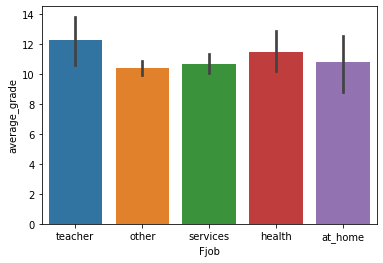

In [25]:
sns.barplot(x=df['Fjob'],y=df['average_grade'],data=df)

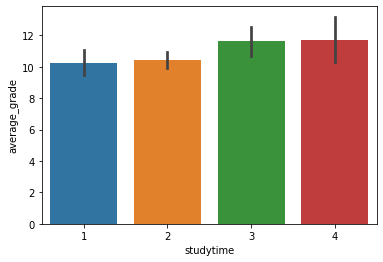

In [26]:
sns.barplot(x=df['studytime'],y=df['average_grade'],data=df)

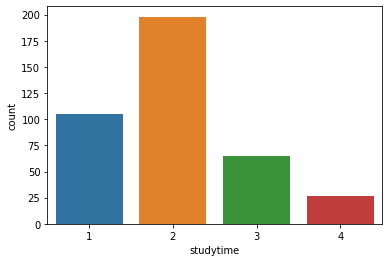

In [28]:
sns.countplot(x=df['studytime'])

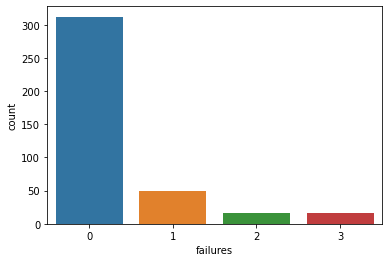

In [29]:
sns.countplot(df['failures'])

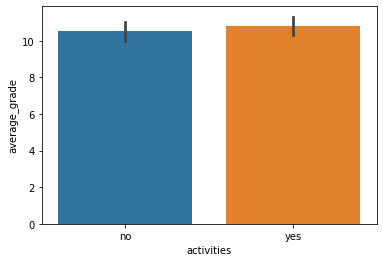

In [30]:
sns.barplot(x=df['activities'],y=df['average_grade'],data=df)

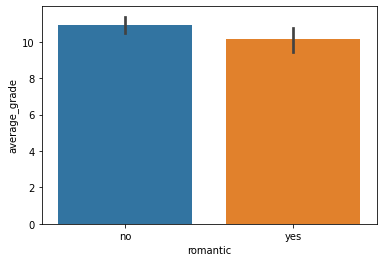

In [31]:
sns.barplot(x=df['romantic'],y=df['average_grade'],data=df)

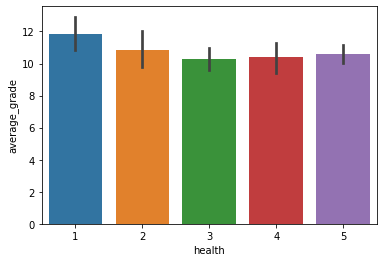

In [32]:
sns.barplot(x=df['health'],y=df['average_grade'],data=df)

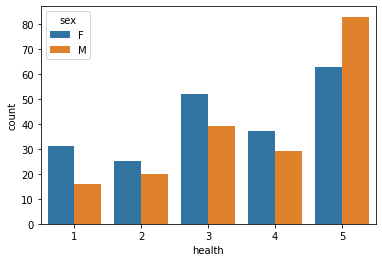

In [33]:
sns.countplot(x=df['health'],hue=df['sex'],data=df)

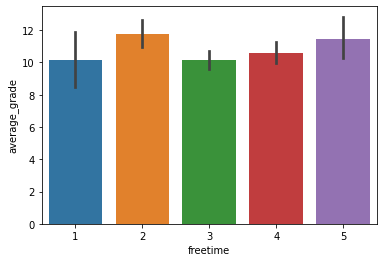

In [34]:
sns.barplot(x=df['freetime'],y=df['average_grade'],data=df)

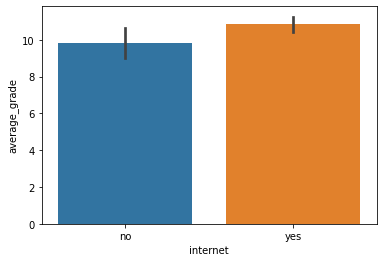

In [35]:
sns.barplot(x=df['internet'],y=df['average_grade'],data=df)

In [36]:
#now we have to deal with the categorical features
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(df.columns):
    df[i]=le.fit_transform(df[i])

In [37]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,average_grade
0,0,0,3,1,0,0,4,4,0,4,0,1,1,1,0,1,0,0,0,1,1,0,0,3,2,3,0,0,2,6,13
1,0,0,2,1,0,1,1,1,0,2,0,0,0,1,0,0,1,0,0,0,1,1,0,4,2,2,0,0,2,4,12
2,0,0,0,1,1,1,1,1,0,2,2,1,0,1,3,1,0,1,0,1,1,1,0,3,2,1,1,2,2,10,21
3,0,0,0,1,0,1,4,2,1,3,1,1,0,2,0,0,1,1,1,1,1,1,1,2,1,1,0,0,4,2,40
4,0,0,1,1,0,1,3,3,2,2,1,0,0,1,0,0,1,1,0,1,1,0,0,3,2,1,0,1,4,4,22


In [38]:
y=df['average_grade']
x=df.drop(['average_grade'],axis=1)

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
list_models=[]
list_scores=[]
list_errors=[]
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_1=lr.predict(x_test)
score_1=r2_score(y_test,pred_1)
error_1=mean_squared_error(y_test,pred_1)
list_models.append('linear regression')
list_scores.append(score_1)
list_errors.append(error_1)

In [41]:
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor()
rfg.fit(x_train,y_train)
pred_2=rfg.predict(x_test)
score_2=r2_score(y_test,pred_2)
error_2=mean_squared_error(y_test,pred_2)
list_models.append('randomforest')
list_scores.append(score_2)
list_errors.append(error_2)

In [42]:
from sklearn.svm import SVR
svm=SVR()
svm.fit(x_train,y_train)
pred_3=svm.predict(x_test)
score_3=r2_score(y_test,pred_3)
error_3=mean_squared_error(y_test,pred_3)
list_models.append('svr')
list_scores.append(score_3)
list_errors.append(error_3)

In [43]:
score_3

0.09307176134446438

In [44]:
from xgboost import  XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
pred_4=xgb.predict(x_test)
score_4=r2_score(y_test,pred_4)
error_4=mean_squared_error(y_test,pred_4)
list_models.append('xgb regressor')
list_scores.append(score_4)
list_errors.append(error_4)

[23:19:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


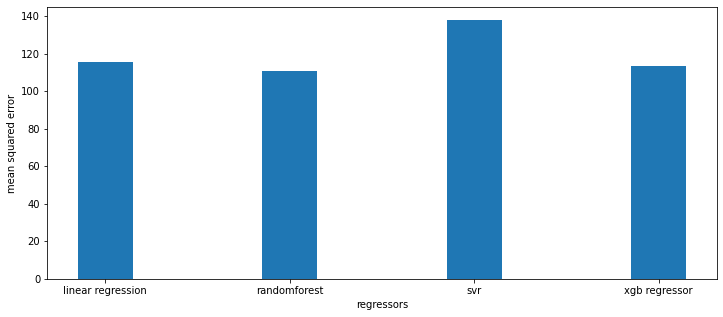

In [45]:
plt.figure(figsize=(12,5))
plt.bar(list_models,list_errors,width=0.3)
plt.xlabel('regressors')
plt.ylabel('mean squared error')
plt.show()

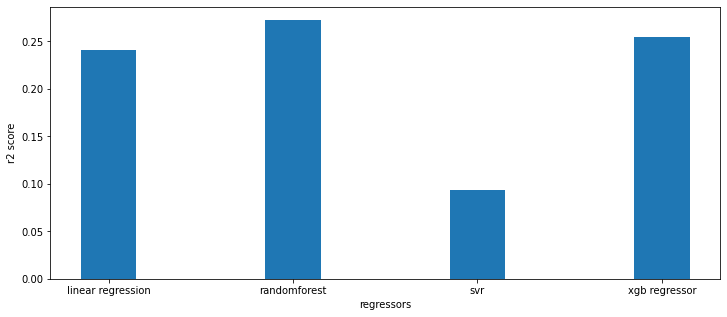

In [46]:
plt.figure(figsize=(12,5))
plt.bar(list_models,list_scores,width=0.3)
plt.xlabel('regressors')
plt.ylabel('r2 score')
plt.show()